In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set(rc={
    'axes.facecolor': "#fdfdfd", "axes.grid": True,
    "grid.color": "#aaa", "grid.linestyle": (0, (4, 3)), "grid.linewidth": 1.3,
    "patch.edgecolor": 'black', "patch.linewidth": 1.35, # rub grafova
    "axes.edgecolor": 'black', "lines.linewidth": 2, # rub oko cijelog grafa
})

In [2]:
results = pd.read_csv("../data/results.csv")

In [3]:
results

,Unnamed: 0,model,dataset,score,method,dimension
0,0,Logistic Regression,iris,0.943396,Original dimensionality,4
1,1,Random Forest Classifier,iris,1.000000,Original dimensionality,4
2,2,Logistic Regression,iris,0.962264,Principal Component Analysis,1
3,3,Random Forest Classifier,iris,0.962264,Principal Component Analysis,1
4,4,Linear Regression,california_housing,0.000033,Principal Component Analysis,1
...,...,...,...,...,...,...
489,489,Random Forest Regressor,ames_housing,0.509108,Locally linear embedding,79
490,490,Logistic Regression,heart_attack,0.822430,Original dimensionality,13
491,491,Random Forest Classifier,heart_attack,0.869159,Original dimensionality,13
492,492,Logistic Regression,stroke,0.971429,Original dimensionality,21


In [4]:
def filter_df(df, model, dataset):
    return df[(df.model == model) & (df.dataset == dataset)]

In [5]:
df = filter_df(results, 'Linear Regression', 'ames_housing')

In [6]:
df

,Unnamed: 0,model,dataset,score,method,dimension
6,6,Linear Regression,ames_housing,0.171138,Principal Component Analysis,1
16,16,Linear Regression,ames_housing,0.631103,Principal Component Analysis,2
26,26,Linear Regression,ames_housing,0.639864,Principal Component Analysis,3
36,36,Linear Regression,ames_housing,0.211325,Locally linear embedding,1
46,46,Linear Regression,ames_housing,0.249278,Locally linear embedding,2
...,...,...,...,...,...,...
480,480,Linear Regression,ames_housing,0.678091,Locally linear embedding,75
482,482,Linear Regression,ames_housing,0.674315,Locally linear embedding,76
484,484,Linear Regression,ames_housing,0.686014,Locally linear embedding,77
486,486,Linear Regression,ames_housing,0.677278,Locally linear embedding,78


In [7]:
baseline = df[df.method == 'Original dimensionality']['score'][128]

In [23]:
datasets

{'ames_housing', 'california_housing', 'heart_attack', 'iris', 'stroke'}

In [39]:
def generate_plot(model, dataset):
    df = filter_df(results, model, dataset)
    print(df)
    if len(df) != 0:
        plt.figure(figsize=(10, 7))
        plot = sns.lineplot(x = 'dimension', y = 'score', hue = 'method', data = df, palette='Paired')
        plt.ylim(0, 1)
        plt.title(dataset)
        fig = plot.get_figure()
        fig.savefig(f"../data/{model}_{dataset}.png")

In [9]:
models = set(results.model.values)
datasets = set(results.dataset.values)

     Unnamed: 0                    model       dataset     score  \
7             7  Random Forest Regressor  ames_housing  0.167664   
17           17  Random Forest Regressor  ames_housing  0.620853   
27           27  Random Forest Regressor  ames_housing  0.662001   
37           37  Random Forest Regressor  ames_housing  0.206126   
47           47  Random Forest Regressor  ames_housing  0.282458   
..          ...                      ...           ...       ...   
481         481  Random Forest Regressor  ames_housing  0.531880   
483         483  Random Forest Regressor  ames_housing  0.510162   
485         485  Random Forest Regressor  ames_housing  0.482492   
487         487  Random Forest Regressor  ames_housing  0.520820   
489         489  Random Forest Regressor  ames_housing  0.509108   

                           method  dimension  
7    Principal Component Analysis          1  
17   Principal Component Analysis          2  
27   Principal Component Analysis         

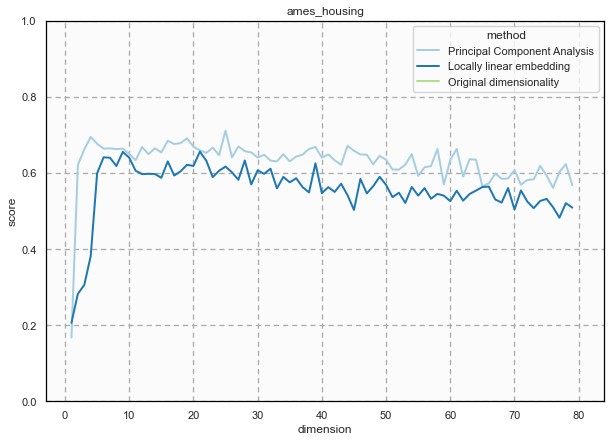

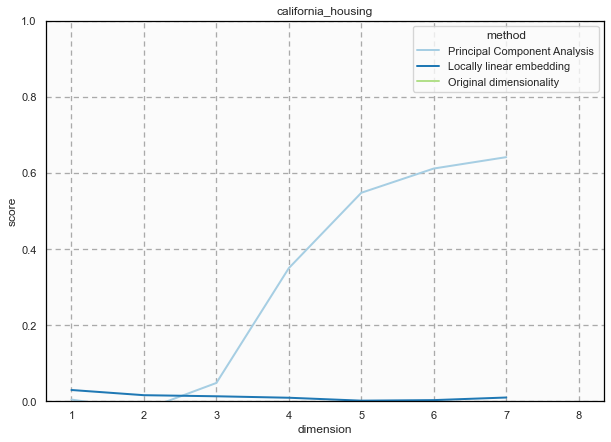

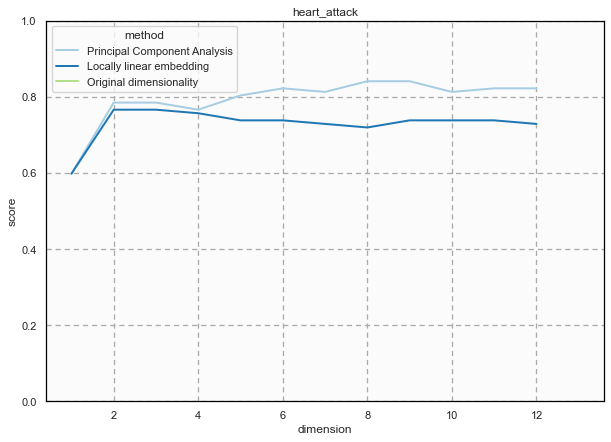

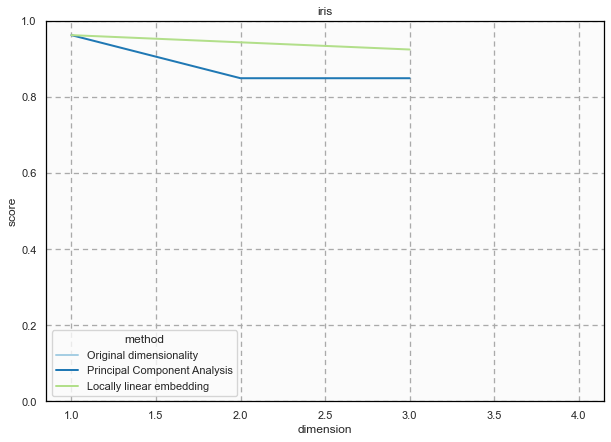

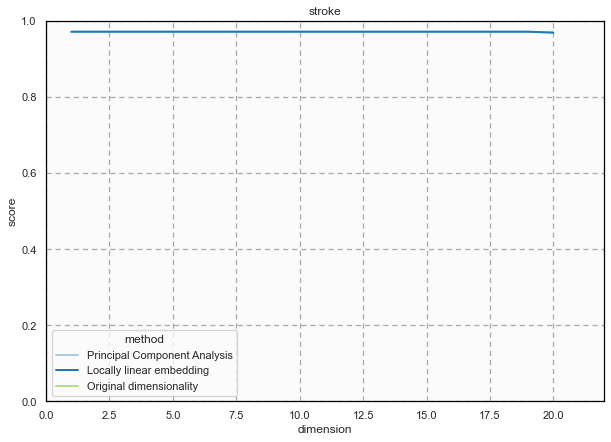

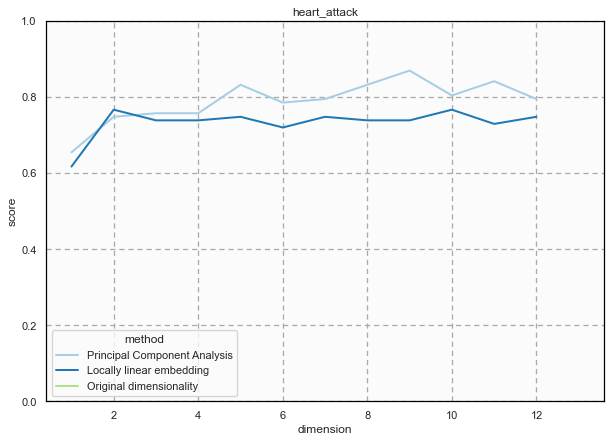

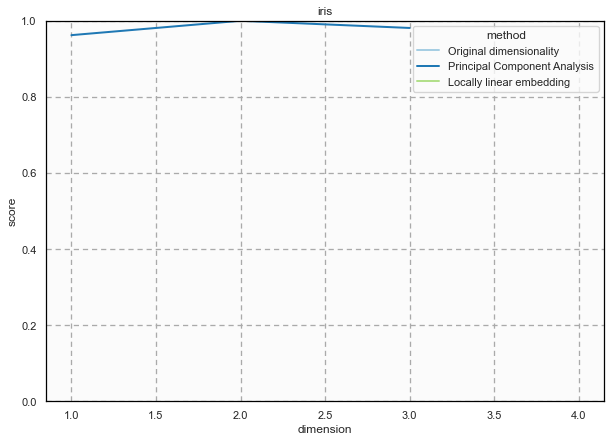

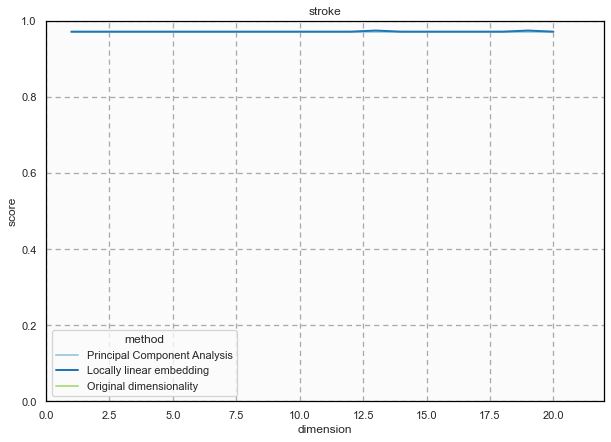

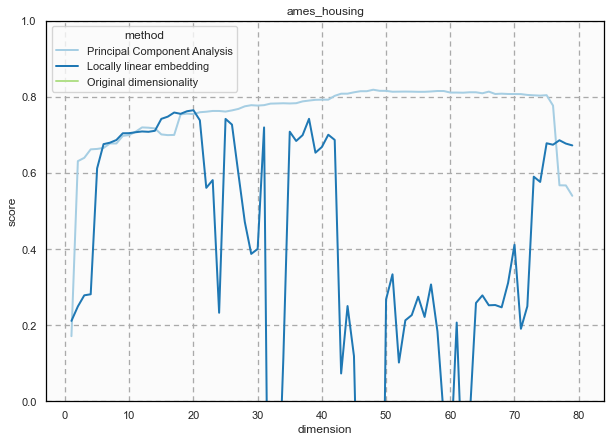

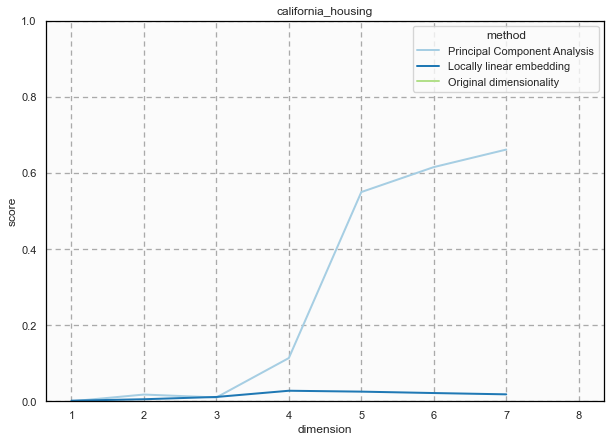

In [40]:
for model in models:
    for dataset in datasets:
        generate_plot(model, dataset)

'Linear Regression'